How do we time execution of functions
=====================================

In [30]:
import timeit
import matplotlib.pyplot as plt

In [96]:
def is_prime1(n):
    "is prime using n steps"
    for i in range(2, n):
        if n%i == 0:
            return False
    return True

def is_prime2(n):
    "is prime using sqrt(n) steps"
    i = 2
    while i*i <= n:
        if n%i == 0:
            return False
        i = i + 1
    return True

In [97]:
# check that they agree
all(is_prime1(n) == is_prime2(n) for n in range(2,1000))

True

In [118]:
X = range(2, 200)

In [125]:
# compute the execution time for is_prime1
time1 = []
for n in X:
    t = timeit.timeit('is_prime1(%d)' % n, number=10000, globals={'is_prime1': is_prime1})
    time1.append(t)

In [126]:
# compute the execution time for is_prime2
time2 = []
for n in X:
    t = timeit.timeit('is_prime2(%d)' % n, number=10000, globals={'is_prime2': is_prime2})
    time2.append(t)

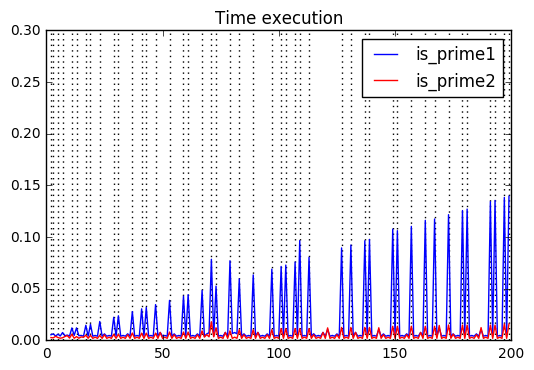

In [127]:
for x in X:
    if is_prime1(x):
        plt.plot([x,x],[0,0.3],':k')
plt.plot(X, time1, 'b', label='is_prime1')
plt.plot(X, time2, 'r', label='is_prime2')
plt.legend()
plt.title('Time execution')
plt.show()